In [1]:
# define logging and working directory
from ProjectRoot import change_wd_to_project_root
change_wd_to_project_root()
from src.utils.notebook_imports import *
from pyforest import *
%matplotlib inline
%reload_ext autoreload
%autoreload 2


from src.utils.utils_io import Console_and_file_logger, ensure_dir
Console_and_file_logger('create_splitting_for_gcn2nd')

search for root_dir and set working directory
Working directory set to: /mnt/data/git/cardio


2020-05-27 18:54:40,045 INFO -------------------- Start --------------------
2020-05-27 18:54:40,046 INFO Working directory: /mnt/data/git/cardio.
2020-05-27 18:54:40,046 INFO Log file: ./logs/create_splitting_for_gcn2nd.log
2020-05-27 18:54:40,046 INFO Log level for console: INFO


# Load one axial 3D and one sax 3D volume of the same patient

In [106]:
import SimpleITK as sitk
from src.visualization.Visualize import show_2D_or_3D
img_ax = sitk.ReadImage('/mnt/data/git/cardio/data/raw/temp_/3D/AX/0000-0RPELLU8_2007-02-13__t6_img.nrrd')
img_sax = sitk.ReadImage('/mnt/data/git/cardio/data/raw/temp_/3D/SAX/0000-0RPELLU8_2007-02-13__t6_img.nrrd')

In [108]:
img_sax.GetDirection()

(0.9999999999999999, 0.0, 0.0, 0.0, 0.9999999999999999, 0.0, 0.0, 0.0, 1.0)

# Set the direction, copied from the import scripts
axial = (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

sax = (0.9854322907115075, 0.11398419070812456, 0.12621729157165731, 3.0922530442603005e-09, 0.7421568086901701, -0.6702262836645713, -0.17006822284915793, 0.6604626223969349, 0.7313452837022285)

axial, origin: (-146.38023233413, -143.3700402975, -19.429523468017)
axial, direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
axial, new direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
------------------------------------------------------------
sax, origin: (124.332992421628, -179.36998514406, 173.736349390548)
sax, direction: (0.9999999999999999, 0.0, 0.0, 0.0, 0.9999999999999999, 0.0, 0.0, 0.0, 1.0)
sax, new direction: (0.3091415955260638, -0.49960021837703766, -0.8092163466670801, 0.9341537121807068, 5.551115123125783e-17, 0.3568709038560098, -0.17829278149887326, -0.8662560948112379, 0.4667033986032014)


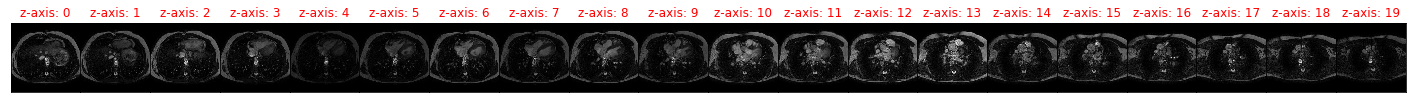

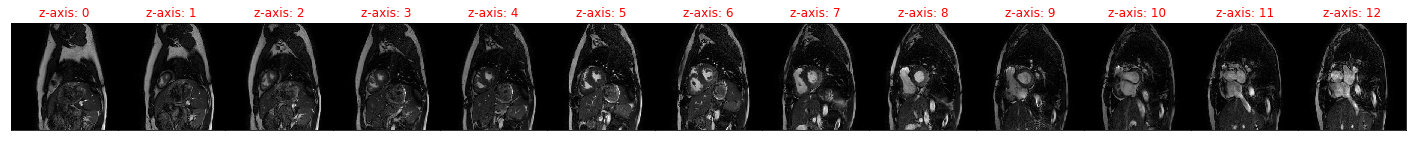

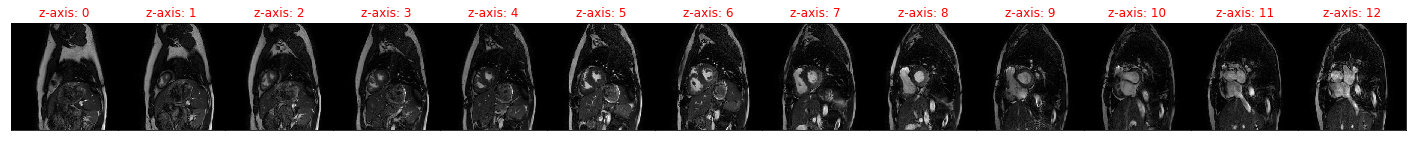

In [101]:
from src.data.Dataset import describe_volume
# ax
print('axial, origin: {}'.format(img_ax.GetOrigin()))
print('axial, direction: {}'.format(img_ax.GetDirection()))
show_2D_or_3D(img_ax)
img_ax.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))
print('axial, new direction: {}'.format(img_ax.GetDirection()))
print('--'*30)
# sax
print('sax, origin: {}'.format(img_sax.GetOrigin()))
print('sax, direction: {}'.format(img_sax.GetDirection()))
show_2D_or_3D(img_sax)
img_sax.SetDirection((0.3091415955260638, -0.49960021837703766, -0.8092163466670801, 
0.9341537121807068, 5.551115123125783e-17, 0.3568709038560098, 
-0.17829278149887326, -0.8662560948112379, 0.4667033986032014))
show_2D_or_3D(img_sax)
print('sax, new direction: {}'.format(img_sax.GetDirection()))

In [102]:
# save sax 3D volume with direction to disk
sitk.WriteImage(img_sax, '/mnt/data/git/cardio/data/raw/temp_/3D/SAX/sax_dir-0RPELLU8_2007-02-13__t6_img.nrrd')

In [76]:
nda_ax = sitk.GetArrayFromImage(img_ax)
nda_sax = sitk.GetArrayFromImage(img_sax)

In [104]:
# patient 0007 has a shape of 256 x 256 x 10

@interact
def resample_with_reference():
    global resampled
    from src.visualization.Visualize import plot_4d_vol
    # resample tests
    print('axial image')
    sitk_img1 = img_ax
    #sitk_img1.SetOrigin((0,0,0))
    print(describe_volume(sitk_img1))
    show_2D_or_3D(sitk_img1)
    plt.show()
    
    print('sax image')
    sitk_img2 = img_sax
    #sitk_img2.SetOrigin((0,0,0))
    print(describe_volume(sitk_img2))
    show_2D_or_3D(sitk_img2)
    plt.show()

    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(sitk_img1)
    resampled = resampler.Execute(sitk_img2)

    print('axial after resample with sax direction:')
    show_2D_or_3D(resampled)
    print(describe_volume(resampled))
    print(resampled.GetOrigin())

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [78]:
# save axial 3D volume with sax direction to disk
sitk.WriteImage(resampled, '/mnt/data/git/cardio/data/raw/temp_/3D/AX/ax_with_saxdir-0RPELLU8_2007-02-13__t6_img.nrrd')

In [95]:
# vector to diag
vector = np.array([1.14583, 1.14583, 8])
diag = np.diag(vector)
print(diag)
mat = np.matrix((0.3091415955260638, -0.49960021837703766, -0.8092163466670801, 
0.9341537121807068, 5.551115123125783e-17, 0.3568709038560098, 
-0.17829278149887326, -0.8662560948112379, 0.4667033986032014))
mat = mat.reshape(3,3)
print(mat)
print(mat * diag)

[[1.14583 0.      0.     ]
 [0.      1.14583 0.     ]
 [0.      0.      8.     ]]
[[ 3.09141596e-01 -4.99600218e-01 -8.09216347e-01]
 [ 9.34153712e-01  5.55111512e-17  3.56870904e-01]
 [-1.78292781e-01 -8.66256095e-01  4.66703399e-01]]
[[ 3.54223714e-01 -5.72456918e-01 -6.47373077e+00]
 [ 1.07038135e+00  6.36063424e-17  2.85496723e+00]
 [-2.04293218e-01 -9.92582221e-01  3.73362719e+00]]
